# Assignment 2
### Understanding Uncertainty
### Due 9/12
### Jarrett Markman

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

There are a variety of variables present in the dataset that can determine which item is the most profitable. You can use volume, how much the bottle costs, how much the bottle is sold for, or the individual sale itself based upon the item. 

In measuring which item is the most profitable item, the most compelling variables are the the sale itself and how much it costs to produce the bottle. I can create a "profit" varaible by subtracting the cost of production (individual bottle cost $*$ number of bottles sold) from the overall "Sale". 

Then based on each item, I can calculate and identify the item that has earned the highest profit. 

In [190]:
# Import pandas & seaborn and read in data
import pandas as pd
import seaborn as sns
df = pd.read_csv("iowa.csv")
# Create a new "profit" column (sale - cost of production for all bottles sold)
# Assuming state bottle cost is per individual bottle
df['profit'] = df['Sale (Dollars)'] - (df['State Bottle Cost'] * df['Bottles Sold'])
# Find the item with the highest amount of total profit
bottles = df.groupby('Item Description').agg({'profit': 'sum'}).sort_values('profit', ascending=False)
top_bottles = bottles[:10] # Top 10 bottles
sns.barplot(top_bottles["profit"], orient="h").set_title("Top 10 Liquor Items by Profit")

FileNotFoundError: [Errno 2] No such file or directory: 'iowa.csv'

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [103]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [104]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

If you subtract y from x, Python returns a "ValueError" because the matrices are of different shapes

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

x.reshape(-1,1), Creates a 3 row by 1 column matrix instead of a 3 element 1-dimensional array. y.reshape(1, -1) creates a 1 row by 2 column matrix instaead of a 2 element 1-dimensional array. This allows Python to perform matrix calculations, specifically subtracting all the columns from the matrix in y, from the individual rows in the matrix x, creating a new 3x2 matrix. 

In [ ]:
x.reshape(1, -1)-y.reshape(-1, 1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In this code block, reshaping x and y do perform the opposite matrix manipulation. Instead of modifying x into a 3x1 matrix, the reshape command modifies it into a 1x3 matrix. Instead of modifying y into a 1x2 matrix, the reshape command here modifies it to a 2x1 matrix. This allows Python to perform matrix calculations, specifically substracting in creating a new 2x3 matrix, but subtracting the row matrix values in x by the column matrix values in y. 

In [ ]:
y.size

2

In [ ]:
# Empty np array
res1 = np.zeros((x.size, y.size))
# For loop for first reshape
for i in range(x.size):
    for j in range(y.size):
        res1[i, j] = x[i] - y[j]
res1

In [ ]:
#Empty np array
res2 = np.zeros((y.size, x.size))
# For loop for second reshape
for i in range(y.size):
    for j in range(x.size):
        res2[i, j] = x[j] - y[i]
res2

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

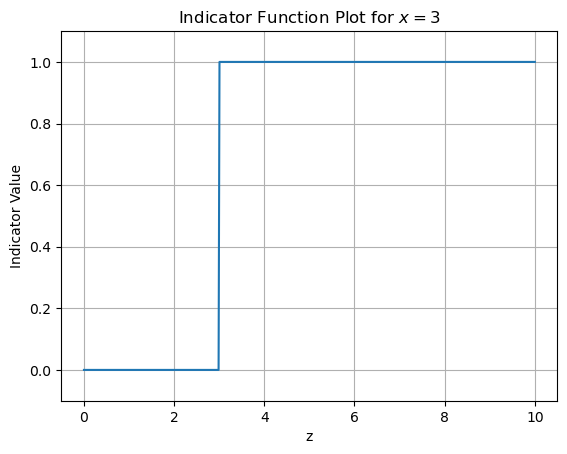

In [ ]:
import matplotlib.pyplot as plt

x_fixed = 3
grid = np.linspace(0, 10, 500)  # Example grid

def indicator(x, grid):
    return (x <= grid).astype(int)

F_x = indicator(x_fixed, grid)

sns.lineplot(x=grid, y=F_x)
plt.title(r'Indicator Function Plot for $x=3$')
plt.xlabel('z')
plt.ylabel('Indicator Value')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()


$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ is extremely sound intuitively, because when $x <= z$ is true, $x > z$ must be false. And when $x > z$ is true, $x <= z$ must be false, meaning that at least one of $\mathbb{I}\{ x \le z \}$ or $\mathbb{I}\{ x > z \}$ are correct every time, and can be described as **complementary events**. 

This can be further explained based on the indicator function:
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

$ \mathbb{I}\{ x \le z \}$ is the opposite of $ \mathbb{I}\{ x > z \}$. So when we perform  $1 - \mathbb{I}\{ x \le z \}$, we return the opposite value of $\mathbb{I}\{ x \le z \}$, which in an case will be $\mathbb{I}\{ x > z \}$, because the two cases are **complementary events**. 

This can additionally be seen in plot above, as (based on the fixed case of $x = 3$) if you subtracted any $z$ value on the plot from $1$, you will return the other $0$ or $1$ value for the inverse function. 

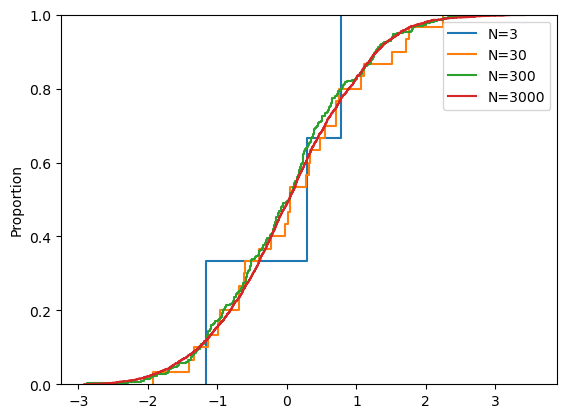

In [ ]:
rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)
    # ECDF plot goes here:
    sns.ecdfplot(X, label=f'N={N}')

plt.legend()

As $N$ increases, the quality of of the ECDF improves, noticably based upon the shape of the curve, with the shape being much smoother rather than being a much more rigid shape/curve (which can be noticably seen with $N = 3$). The curve becomes much more noticeably smoother when $N=300$ and $N=3000$ as $N$ increases. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [122]:
# Compute quantile function
def compute_quantile(num_list, quantile):
    sorted_list = sorted(num_list)
    n = len(sorted_list)
    idx = quantile * (n - 1)
    lower = int(idx)
    upper = lower + 1
    weight = idx - lower
    return sorted_list[lower] * (1 - weight) + sorted_list[upper] * weight

In [130]:
# Compute IQR function (returns iqr, 25%, 75%, lower whisker, upper whisker)
def compute_iqr(num_list):
    q1 = compute_quantile(num_list, 0.25)
    q3 = compute_quantile(num_list, 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return iqr, q1, q3, lower, upper

In [148]:
# Compute function that returns a five-number summary and values from a boxplot (min, max, .25, .75, minimum, median, whiskers)
def summary(num_list):
    min = np.min(num_list)
    max = np.max(num_list)
    median = compute_quantile(num_list, 0.5)
    iqr, q1, q3, lower, upper = compute_iqr(num_list)
    return print(f"min: {min}", 
                 f"q1: {q1}", 
                 f"median: {median}", 
                 f"q3: {q3}",
                 f"max: {max}", 
                 f"lower: {lower}", 
                 f"upper: {upper}", sep = "\n")

In [133]:
# Function that tests if a given value is an outlier
def outlier(num_list):
    iqr, q1, q3, lower, upper = compute_iqr(num_list)
    for i in num_list:
        if num_list[i] < lower or num_list[i] > upper:
            return True
        else:
            return False

In [151]:
summary(df['Bottles Sold'])

min: -60
q1: 3.0
median: 6.0
q3: 12.0
max: 2400
lower: -10.5
upper: 25.5


In [160]:
df['Bottles Sold'].describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

In [183]:
# Get upper and lower bounds for whisker
iqr_values = compute_iqr(df['Bottles Sold'])
lower = iqr_values[3]
upper = iqr_values[4]
# Filter out outliers
plot_df = df[(df['Bottles Sold'] < upper) & (df['Bottles Sold'] > lower)]

#### Boxplot with Outliers

<Axes: ylabel='Bottles Sold'>

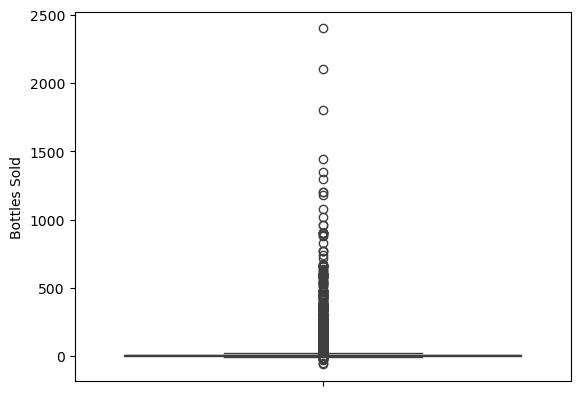

In [184]:
sns.boxplot(y = 'Bottles Sold', data = df)

#### Boxplot Without Outliers

<Axes: ylabel='Bottles Sold'>

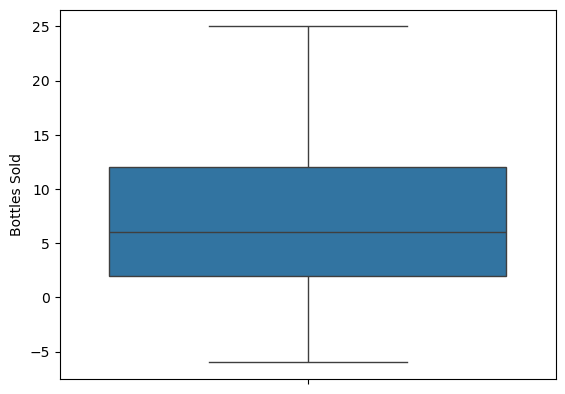

In [ ]:
sns.boxplot(y = 'Bottles Sold', data = plot_df)

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?